<h1>Book Contents</h1>
<li>Creation of 2D Integer-to-Integer 5/3 Lifting Wavelet transform</li>
<li>Perform Transform on a file (irrespective of format, <a href=https://ieeexplore.ieee.org/document/8692644>HanQiu[2021]</a> ) at level 2</li>


In [55]:
!pip install pillow
!pip install numpy
!pip install numba
!pip install opencv-python
!pip install pycryptodome
!pip install quantcrypt


In [56]:
from PIL import Image
from IPython.display import display, HTML

def display_images_in_grid(ll, hl, lh, hh):
    
    display(HTML('<h2>LL</h2>'))
    display(Image.fromarray(ll))
    print(ll.shape)
    
    display(HTML('<h2>HL</h2>'))
    display(Image.fromarray(hl))
    print(hl.shape)

    display(HTML('<h2>LH</h2>'))
    display(Image.fromarray(lh))
    print(lh.shape)

    display(HTML('<h2>HH</h2>'))
    display(Image.fromarray(hh))
    print(hh.shape)

<h1>2D DWT Transform.</h1>

<br><h1>2D DWT test with image input.</h1>

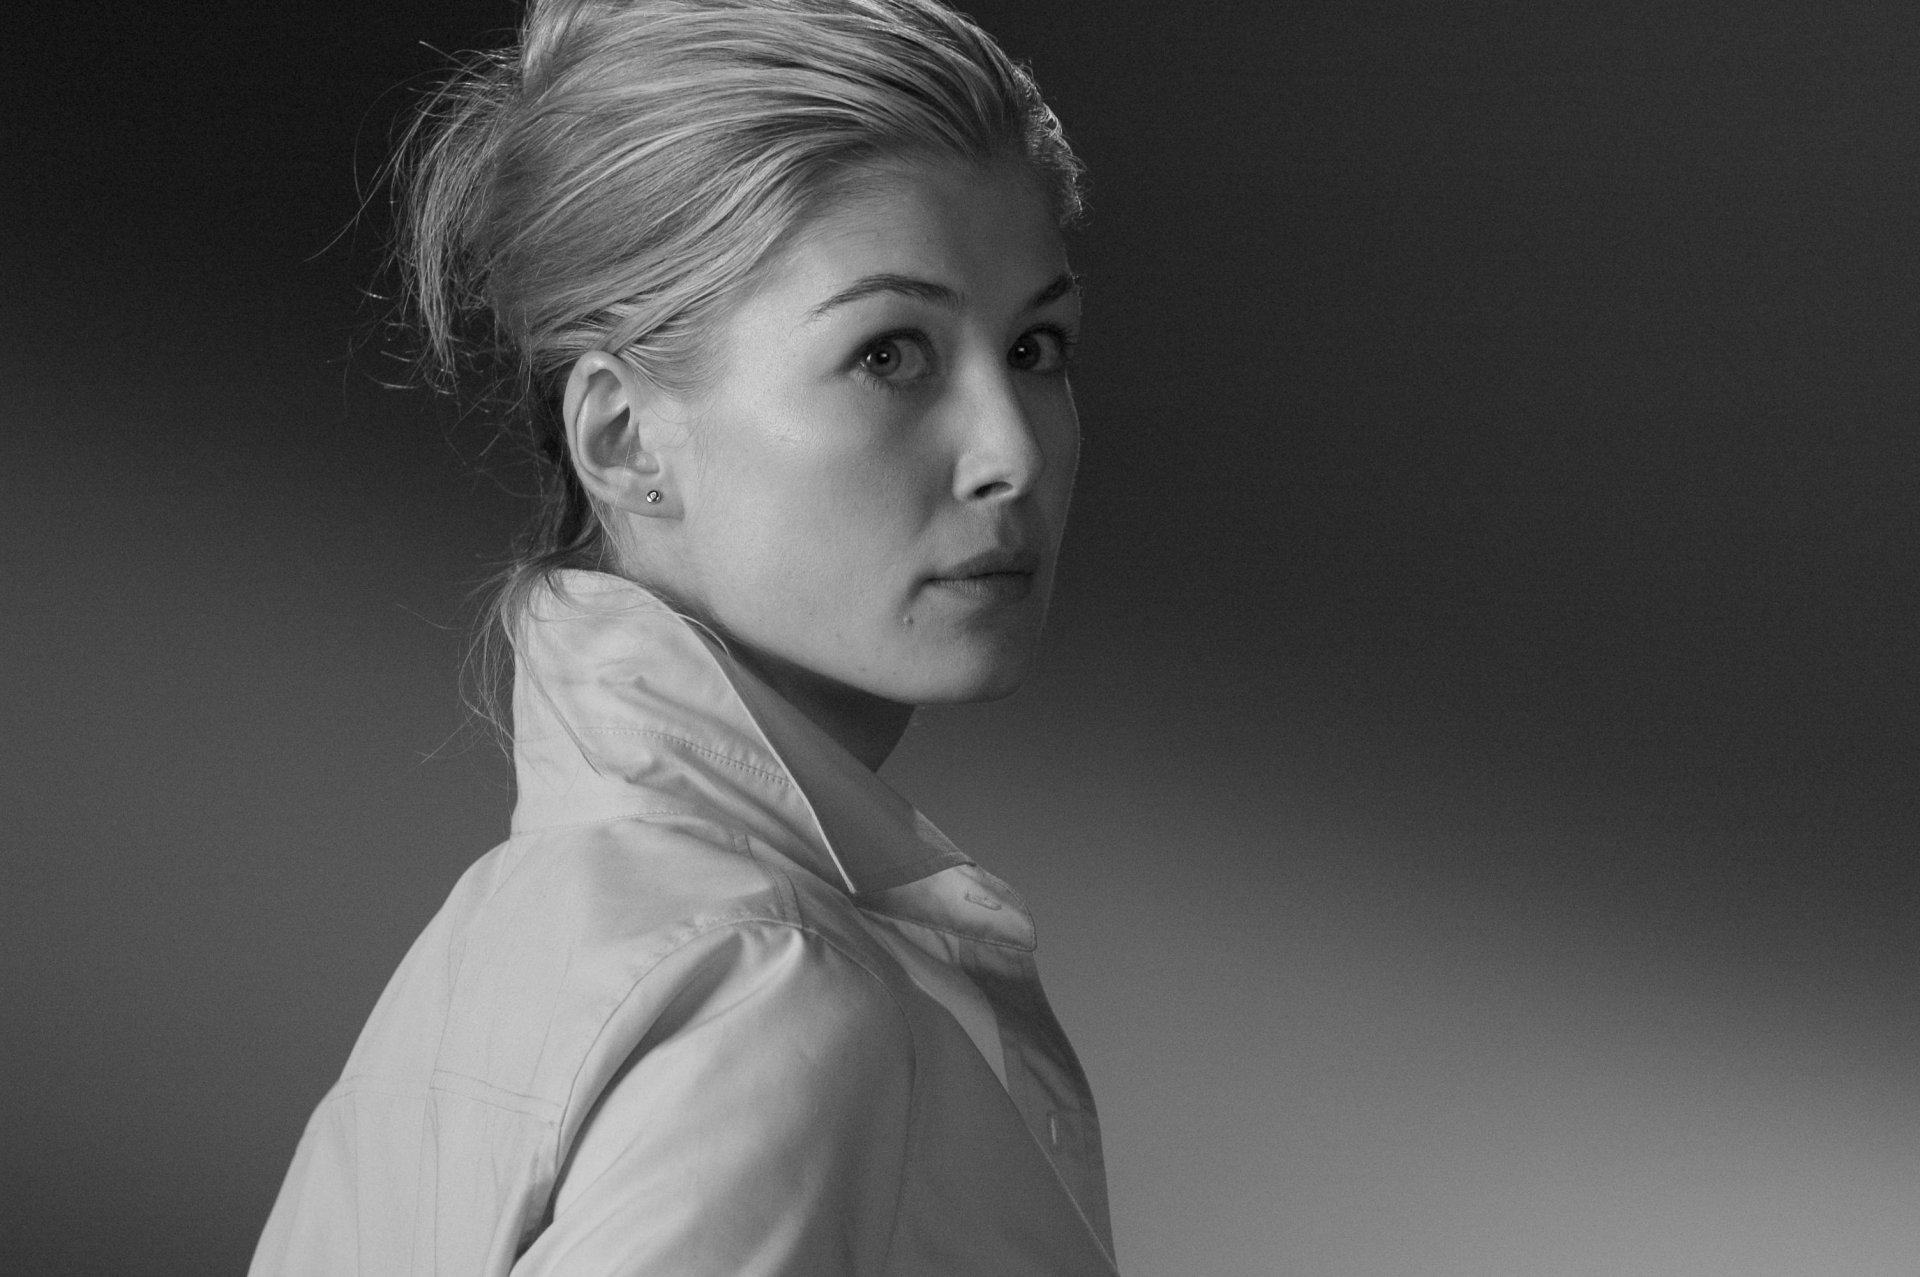

(1277, 1920)


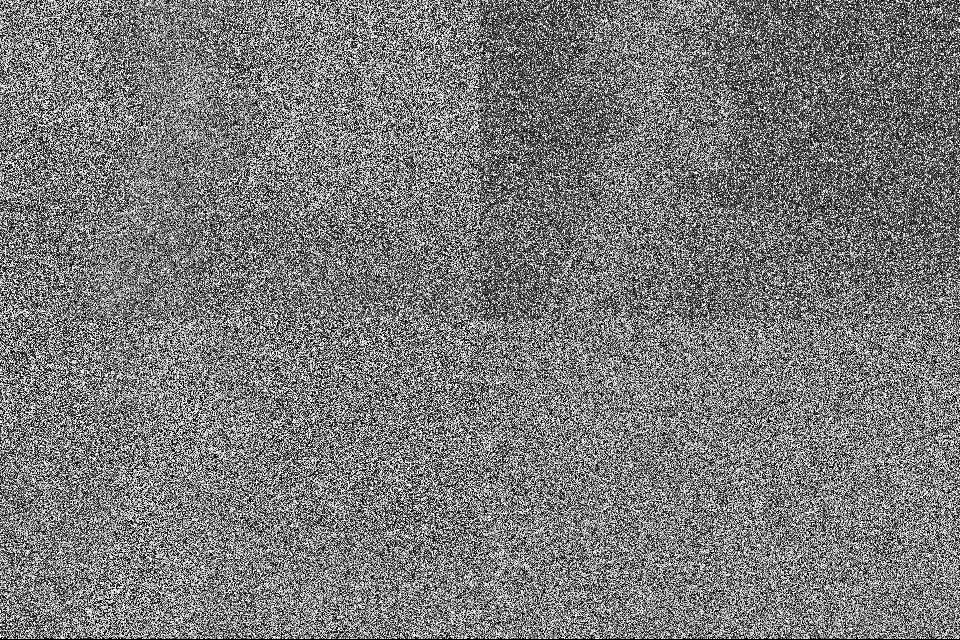

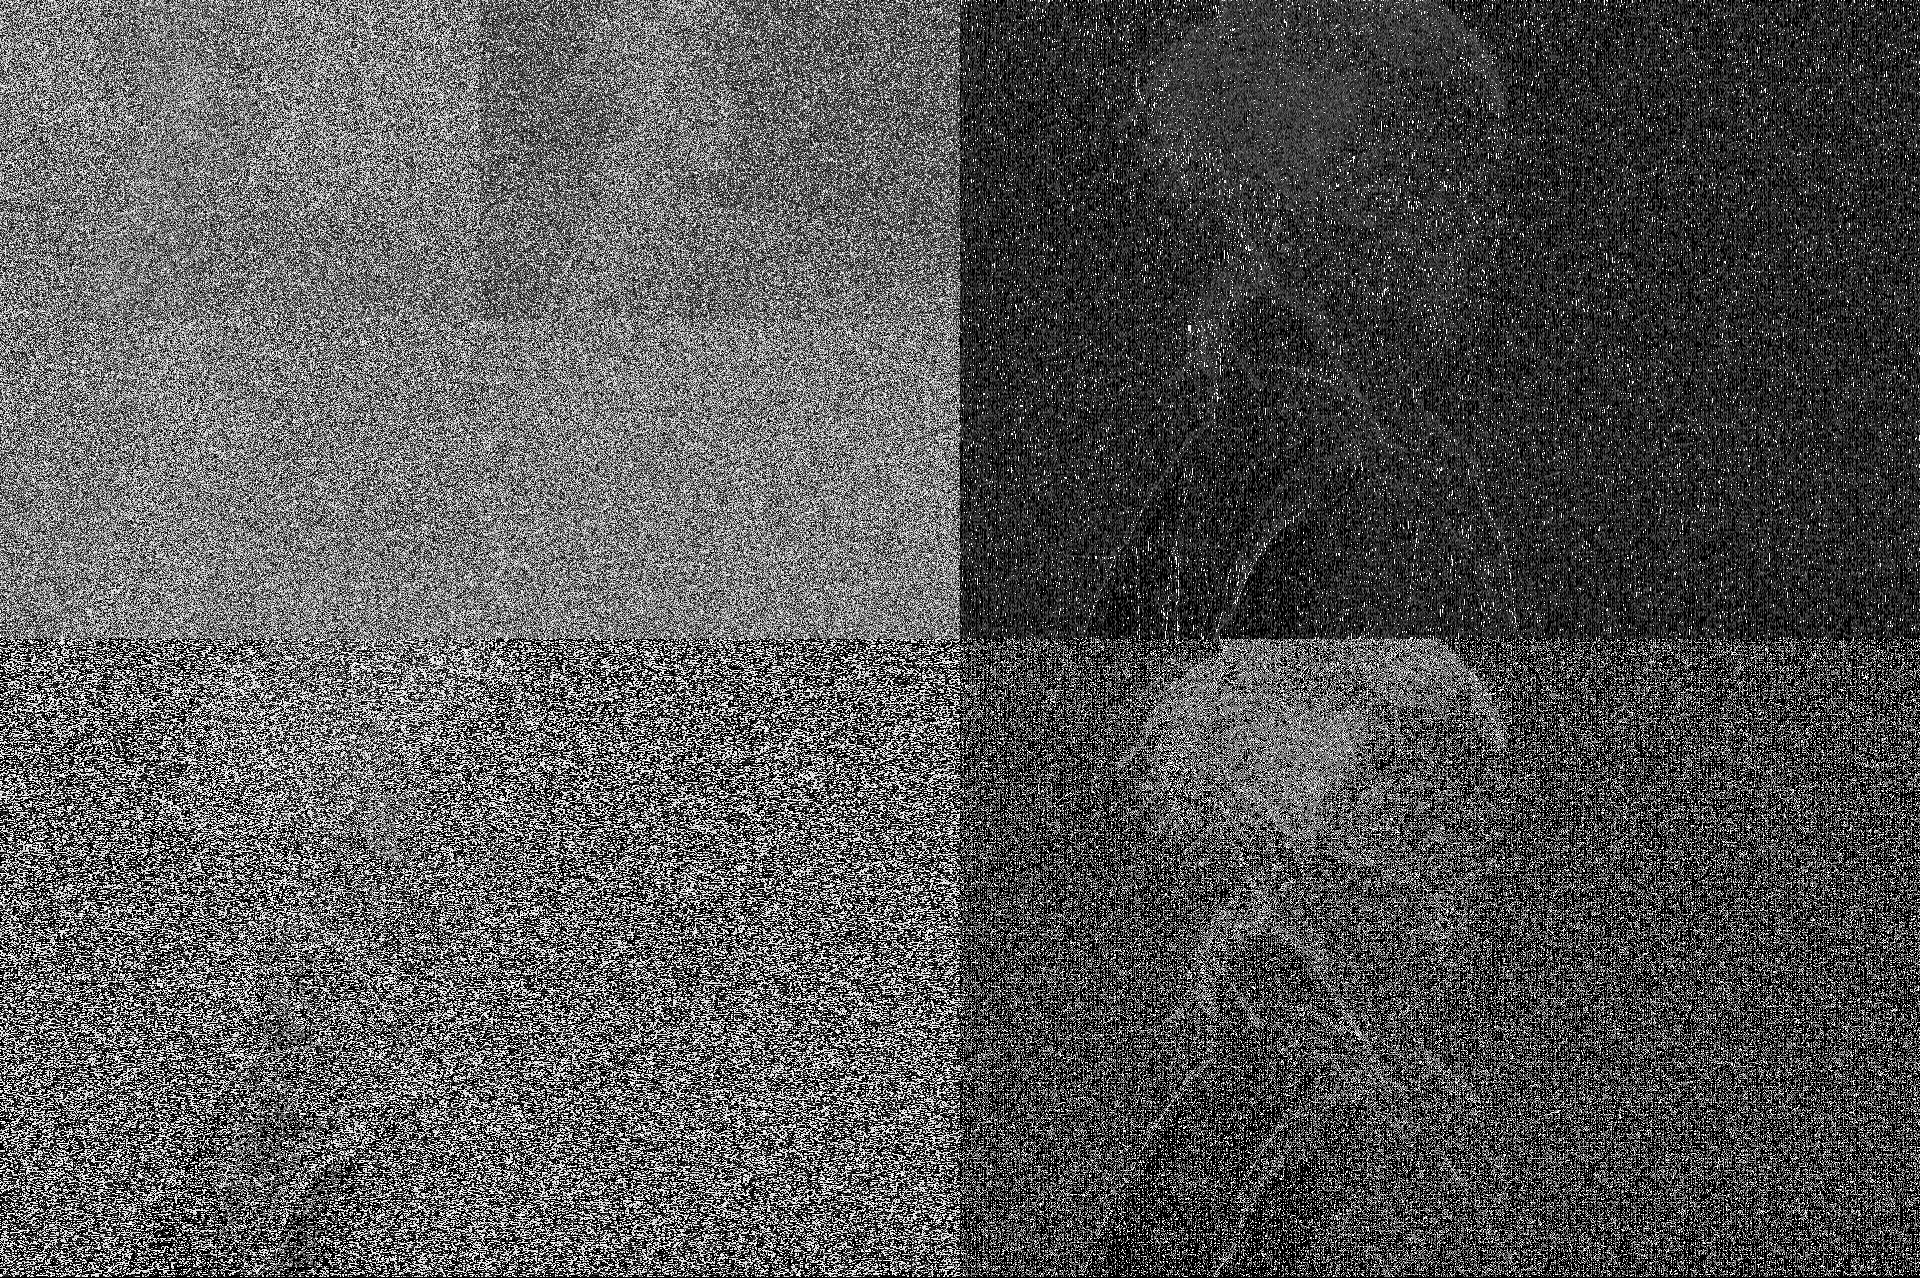

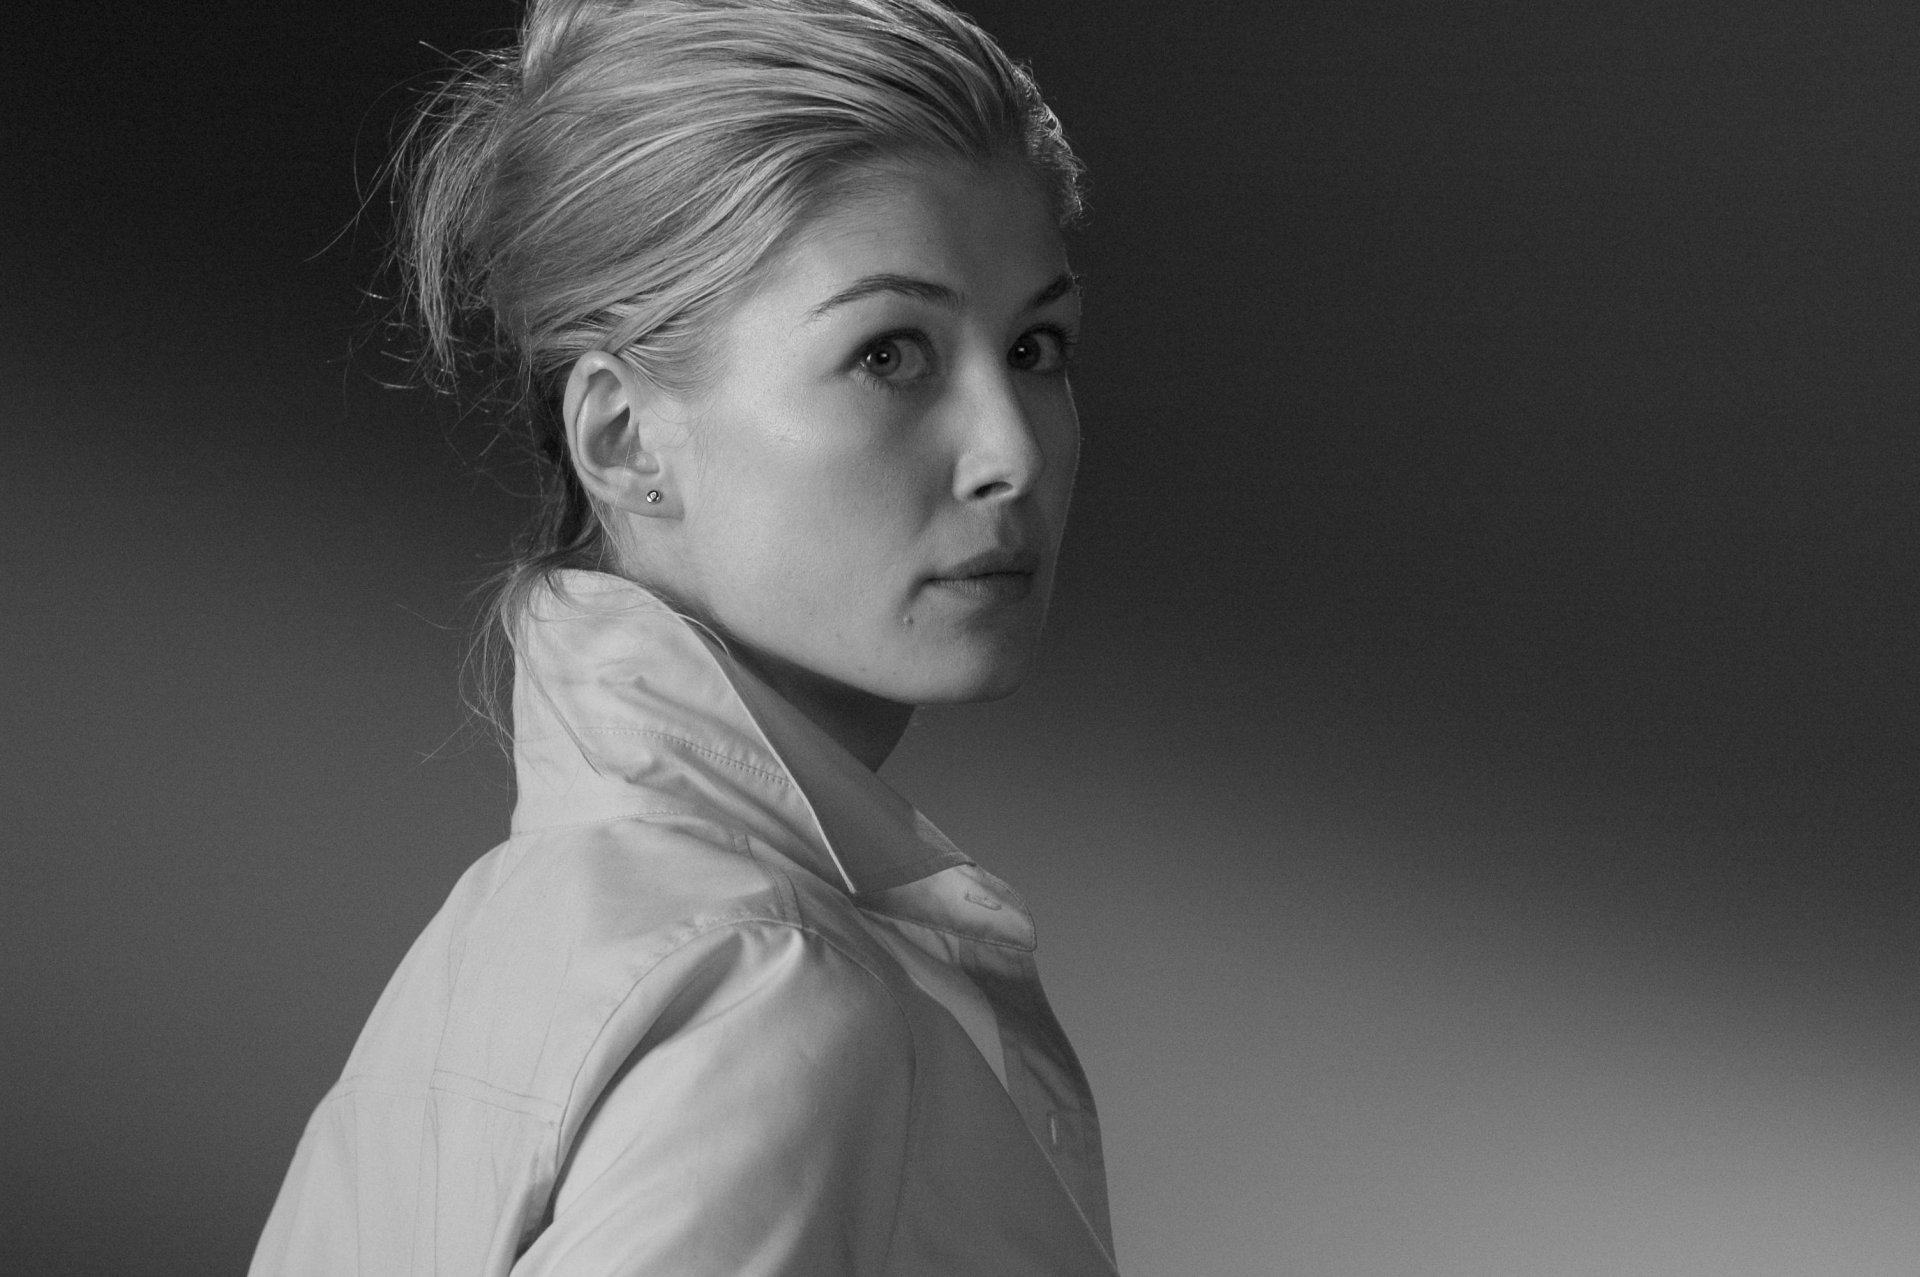

In [57]:
import cv2
import time
import dwt_2d

def test_2d_dwt_image():

    img = cv2.imread('data/files/thumb.jpg', cv2.IMREAD_GRAYSCALE)
    ll, hl, lh, hh = dwt2d(img)
    
    display(HTML('<h2>Input Image</h2>'))
    display(Image.fromarray(img))
    print(img.shape)

    # display(HTML('<h2>Output 2D DWT LVL 1</h2>'))
    # display_images_in_grid(ll, hl, lh, hh)

    ll2, hl2, lh2, hh2 = dwt2d(ll)

    time.sleep(3)
    ll2_image = Image.fromarray(ll2)
    hl2_image = Image.fromarray(hl2)
    lh2_image = Image.fromarray(lh2)
    hh2_image = Image.fromarray(hh2)
    width2, height2 = ll2_image.size
    grid_img2 = Image.new('L', (2*width2, 2*height2))
    grid_img2.paste(ll2_image, (0,0))
    grid_img2.paste(hl2_image, (width2,0))
    grid_img2.paste(lh2_image, (0, height2))
    grid_img2.paste(hh2_image, (width2, height2))
    display(grid_img2)

    # display(HTML('<h2>Output 2D DWT LVL 2</h2>'))
    # display_images_in_grid(ll2, hl2, lh2, hh2)

    ll_image = Image.fromarray(ll)
    hl_image = Image.fromarray(hl)
    lh_image = Image.fromarray(lh)
    hh_image = Image.fromarray(hh)

    width, height = ll_image.size
    grid_img = Image.new('L', (2*width, 2*height))

    grid_img.paste(grid_img2, (0,0))
    grid_img.paste(hl_image, (width,0))
    grid_img.paste(lh_image, (0, height))
    grid_img.paste(hh_image, (width, height))

    display(grid_img)
    
    re_seq = test_2d_idwt_image((ll, hl, lh, hh), (ll2, hl2, lh2, hh2))
    display(HTML(f'<h2>Perfect Data Reconstruction... {np.array_equal(img,re_seq)}</h2>'))
    
def test_2d_idwt_image(lvl1_coeff, lvl2_coeff):
    
    ll, hl, lh, hh = lvl1_coeff
    ll2, hl2, lh2, hh2 = lvl2_coeff
    
    ll_i = idwt2d(ll2, hl2, lh2, hh2)
    img_i = idwt2d(ll_i, hl, lh, hh)
    
    display(HTML('<h2>Reconstructed Image</h2>'))
    display(Image.fromarray(img_i))
    return img_i
    
test_2d_dwt_image()

<br><h1>Selective Encryption on a file as proposed in <a href=https://ieeexplore.ieee.org/document/8692644>HanQiu[2021]</a></h1>

<b>Example post quantum secure communication between ALice and Bob</b>

In [58]:
#Requires Pre knowledge for all parties 
buffer_size = 1024 # y of (y X y)
sha_key_str = 'Tuesday Evening'

In [59]:
from quantcrypt.kem import Kyber

kem = Kyber()

In [60]:
#ALice generates key pair
public_key, secret_key = kem.keygen()

In [61]:
import selective_encryption
#Bob generates cipher and shared secret using ALice's pk
cipher_text, shared_secret = kem.encaps(public_key)

#Bob encrypts the message using shared_secret
se_encrypt(file_path='data/files/landscape.png',
           sha_key_str=sha_key_str, 
           buffer=buffer_size,
           aes_key=shared_secret)

In [62]:
#ALice decrypts cipher she receives from Bob to extract shared secret
shared_secret_copy = kem.decaps(secret_key, cipher_text)

In [63]:
#ALice decrypts the message using shared_secret_copy
se_decrypt(file_PF= 'data/files/enc/landscape.png_PF.npy',
           file_PPF_1= 'data/files/enc/landscape.png_PPF_1.npy',
           file_PPF_2= 'data/files/enc/landscape.png_PPF_2.npy',
           buffer=buffer_size,
           output_file_path='data/files/dec/landscape.png',
           sha_key_str=sha_key_str, 
           aes_key=shared_secret_copy)